# Effects of Framing Styles in Physical Activity Intervention
## Thalia Viranda, Katara Zhiduo Xie, Melissa Tan


This document contains our data cleaning and preprocessing steps. 


In [1]:
import os
import importlib
import subprocess
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set working directory - CHANGE THIS TO YOUR PATH
main_dir = "/Users/zhiduokatara/Cornell Tech/Fall24/ORIE 5160_Stats for DS/ORIE-5160-midterm-project"
data_dir = os.path.join(main_dir, "data/")
figure_dir = os.path.join(main_dir, "figure/")

# Change the current working directory
os.chdir(main_dir)  

# Load packages
# Define a list of package names
packages = ["pandas", "numpy", "matplotlib", "seaborn", "statsmodels", "datetime"]

# Function to install and import packages
for pkg in packages:
    try:
        importlib.import_module(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
        globals()[pkg] = importlib.import_module(pkg)

/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_68532/3820408650.py:5: DtypeWarning: Columns (21,22,38,39,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  suggestions_dat = pd.read_csv(os.path.join(data_dir, "suggestions.csv"))
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


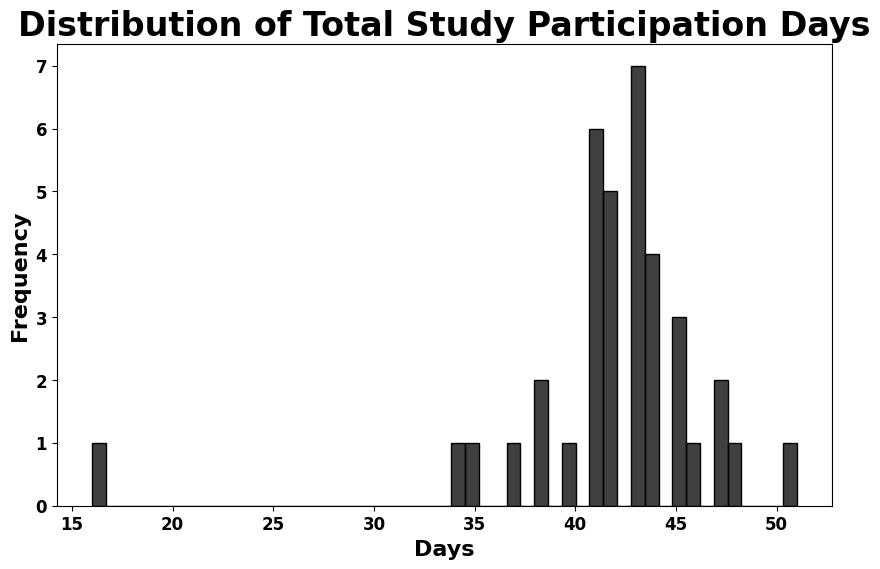

count    197524.000000
mean         27.155085
std          88.415296
min           1.000000
25%           1.000000
50%           4.000000
75%          27.000000
max        4929.000000
Name: steps, dtype: float64
Unique users in clean_steps_notif_users: 35
Unique users in mydata_steps_gf: 35


/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


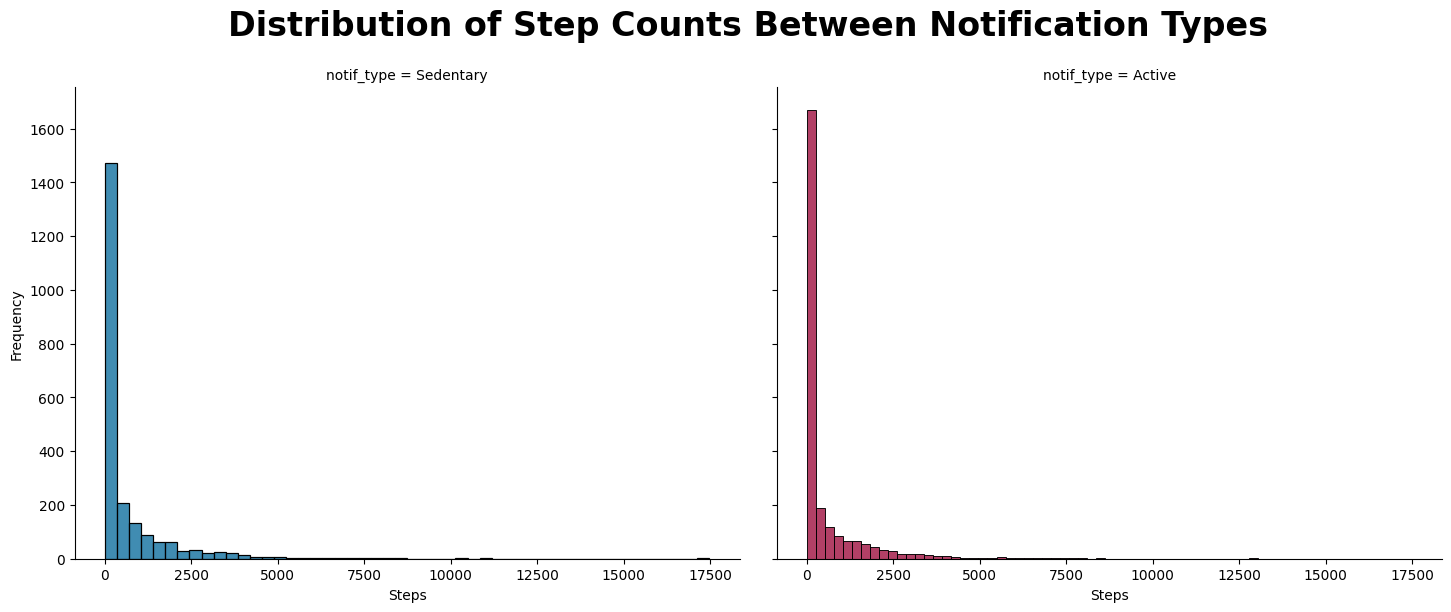

  notif_type               key      n  mean     var    sd   se  median   IQR
0     Active  selfeff_intake_r  49126  15.0    12.2   3.5  0.0    15.0   6.0
1     Active             steps  49126  27.1  7033.5  83.9  0.4     4.0  27.0
2  Sedentary  selfeff_intake_r  44898  14.7    14.1   3.8  0.0    15.0   5.0
3  Sedentary             steps  44898  29.1  9201.5  95.9  0.5     4.0  28.0


In [2]:
# Read CSV files
steps_gf = pd.read_csv(os.path.join(data_dir, "gfsteps.csv"))
steps_jb = pd.read_csv(os.path.join(data_dir, "jbsteps.csv"))
users_info = pd.read_csv(os.path.join(data_dir, "users.csv"))
suggestions_dat = pd.read_csv(os.path.join(data_dir, "suggestions.csv"))


# Assuming `users_info` DataFrame is already loaded
# Select specific columns
mydata_qs = users_info.filter(regex="user.index|totaldays|^selfeff")


# Reverse Scoring and Summed Variables
mydata_qs = mydata_qs.assign(
    selfeff_badmood_intake_r = 6 - mydata_qs["selfeff.badmood.intake"],
    selfeff_notime_intake_r = 6 - mydata_qs["selfeff.notime.intake"],
    selfeff_tired_intake_r = 6 - mydata_qs["selfeff.tired.intake"],
    selfeff_vaca_intake_r = 6 - mydata_qs["selfeff.vaca.intake"],
    selfeff_precip_intake_r = 6 - mydata_qs["selfeff.precip.intake"],
    
    # Summing intake reverse-scored values
    selfeff_intake_r = lambda x: (
        x["selfeff_notime_intake_r"] + x["selfeff_tired_intake_r"] +
        x["selfeff_vaca_intake_r"] + x["selfeff_precip_intake_r"] +
        x["selfeff_badmood_intake_r"]
    ),

    selfeff_badmood_exit_r = 6 - mydata_qs["selfeff.badmood.exit"],
    selfeff_notime_exit_r = 6 - mydata_qs["selfeff.notime.exit"],
    selfeff_tired_exit_r = 6 - mydata_qs["selfeff.tired.exit"],
    selfeff_vaca_exit_r = 6 - mydata_qs["selfeff.vaca.exit"],
    selfeff_precip_exit_r = 6 - mydata_qs["selfeff.precip.exit"],

    # Summing exit reverse-scored values
    selfeff_exit_r = lambda x: (
        x["selfeff_notime_exit_r"] + x["selfeff_tired_exit_r"] +
        x["selfeff_vaca_exit_r"] + x["selfeff_precip_exit_r"] +
        x["selfeff_badmood_exit_r"]
    )
)


# Histogram of Total Days
plt.figure(figsize=(10, 6))
sns.histplot(mydata_qs['totaldays'], bins=51, color="black", edgecolor="black")
plt.title("Distribution of Total Study Participation Days", fontsize=24, fontweight="bold")
plt.xlabel("Days", fontsize=16, fontweight="bold")
plt.ylabel("Frequency", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
# plt.gca().set_facecolor("transparent")
plt.savefig(os.path.join(figure_dir,"hist_totalday.png"), transparent=True)
plt.show()

# Creating Notification Type Data
notif_type = suggestions_dat[['user.index', 'decision.index', 'send', 'send.active', 'send.sedentary']]

# Merging Data
steps_notif = pd.merge(steps_gf, notif_type, on=['user.index', 'decision.index'], how='outer')
steps_notif_users = pd.merge(steps_notif, mydata_qs, on='user.index', how='outer')

# Converting columns to boolean
steps_notif_users['send'] = steps_notif_users['send'].astype(bool)
steps_notif_users['send.active'] = steps_notif_users['send.active'].astype(bool)

# Sorting and modifying user.index
steps_notif_users = steps_notif_users.sort_values(by='steps.utime')
steps_notif_users['user.index'] = pd.to_numeric(steps_notif_users['user.index'], errors='coerce')

# Summary Statistics
steps_summary = steps_notif_users['steps'].describe()
print(steps_summary)

# Exporting Data to CSV
steps_notif_users.to_csv(os.path.join(data_dir, "steps_notif_users_py.csv"), index=False)


# # Function to handle missing data in 'steps' column using LOCF
# def handle_missing_steps_locf(data):
#     data['steps'] = data['steps'].fillna(method='ffill')
#     return data

# # Apply LOCF to steps column
# steps_notif_users = handle_missing_steps_locf(steps_notif_users)

# Filter and transform steps_notif_users
clean_steps_notif_users = (
    steps_notif_users
    .loc[(steps_notif_users['send'] == True) & (~steps_notif_users['user.index'].isin([29, 22])) & (~steps_notif_users['decision.index'].isna())]  # Filtering for send == True and excluding users 29 and 22 and those with missing decision index
    .assign(
        notif_type=lambda x: x['send.active'].apply(lambda y: "Active" if y else "Sedentary"),
        steps_date=lambda x: pd.to_datetime(x['steps.utime']).dt.date
    )
    .dropna(subset=['notif_type'])  # Ensure notif_type is not NA
    .sort_values(by=['user.index', 'steps.utime'])
    .assign(
        day=lambda x: x.groupby('user.index')['steps_date'].transform(lambda y: pd.factorize(y)[0] + 1)
    )
)


# Summary statistics, filtering, and transformations for mydata_steps_gf
mydata_steps_gf = (
    clean_steps_notif_users
    .loc[:, ['user.index', 'steps_date', 'day', 'notif_type', 'decision.index', 'steps', 'selfeff_intake_r']]
    .groupby(['user.index', 'day', 'notif_type', 'decision.index', 'selfeff_intake_r'], as_index=False)
    .agg(
        n=('steps', 'size'),
        total_steps=('steps', 'sum')
    )
    .dropna(subset=['total_steps'])  # Filter rows where total_steps is NA
    .sort_values(by=['user.index', 'decision.index']
))

# View the count of unique users in clean_steps_notif_users and mydata_steps_gf
unique_user_count_clean = clean_steps_notif_users['user.index'].nunique()
unique_user_count_mydata = mydata_steps_gf['user.index'].nunique()

print(f"Unique users in clean_steps_notif_users: {unique_user_count_clean}")
print(f"Unique users in mydata_steps_gf: {unique_user_count_mydata}")

# Exporting Data to CSV
mydata_steps_gf.to_csv(os.path.join(data_dir, "mydata_steps_gf_py.csv"), index=False)

# STEP 1: Check for Normality (Histogram)
# Set up the FacetGrid with 'notif_type' as the facet variable
mypalette = {"Active": "#006699", "Sedentary": "#990033"}
g = sns.FacetGrid(mydata_steps_gf, col="notif_type", height=6, aspect=1.2, sharex=True, sharey=True, palette=mypalette)
# Map sns.histplot to each facet, using the color for each 'notif_type'
for ax, (notif_type, color) in zip(g.axes.flat, mypalette.items()):
    sns.histplot(
        data=mydata_steps_gf[mydata_steps_gf['notif_type'] == notif_type],
        x="total_steps", bins=50, color=color, edgecolor="black", ax=ax
    )
g.figure.suptitle("Distribution of Step Counts Between Notification Types", fontsize=24, weight='bold')
g.set_axis_labels("Steps", "Frequency")
plt.subplots_adjust(top=0.85)
# Save the facet-wrapped plot with a transparent background
g.savefig(os.path.join(figure_dir,"steps_dist_all_faceted.png"), transparent=True)
plt.show()

# STEP 2: Check for Overdispersion (Summary Statistics)
# Melt data to long format (similar to `gather`)
melted_data = pd.melt(
    clean_steps_notif_users, 
    id_vars=['notif_type'], 
    value_vars=['steps', 'selfeff_intake_r'],
    var_name='key', 
    value_name='value'
)

# Group by and calculate summary statistics
SUMM_mydata_steps_gf = (
    melted_data
    .groupby(['notif_type', 'key'])
    .agg(
        n=('value', 'size'),
        mean=('value', lambda x: round(np.mean(x.dropna()), 1)),
        var=('value', lambda x: round(np.var(x.dropna()), 1)),
        sd=('value', lambda x: round(np.std(x.dropna()), 1)),
        se=('value', lambda x: round(np.std(x.dropna()) / np.sqrt(x.notna().sum()), 1)),
        median=('value', lambda x: round(np.median(x.dropna()), 1)),
        IQR=('value', lambda x: round(np.percentile(x.dropna(), 75) - np.percentile(x.dropna(), 25), 1))
    )
).reset_index()

# Display summary statistics
print(SUMM_mydata_steps_gf)


# EDA (need to be moved to a different file later to follow the PCS framework)


## RQ 1a: Effects of Framing Styles on Step Counts

Let's do: 
- between notifications/decision index (what we did for presentation); so the models will be: 
    - GF: 
        - total steps ~ notif_type (i.e., notif_type predicting total steps)
        - 30 after ~ notif_type
        - 60 after ~ notif_type

    - JAWBONE: 
        - total steps ~ notif_type
        - 30 after ~ notif_type
        - 60 after ~ notif_type
    
- to do the analyses for the steps 30 and 60 min after the notification is sent for both GF AND and Jawbone data, we need to do the following data preprocessing
    - get total step counts 30 min and 60 min after the notification for GF and Jaw bone
    - replaced the total_steps in the model with these two variables  


P.S. KATARA, I feel like we should turn each of these into a function since we are repeating the same analyses for the different *dependent variables (total steps between notifs, 30min after notif, 60 min after notif)* and the different *datasets (GF, Jawbone)*. 

What do you think?



  user.index  day notif_type decision.index  selfeff_intake_r   n  \
0          1    1  Sedentary            0.0                11  23   
1          1    1     Active            1.0                11  31   
2          1    1  Sedentary            3.0                11  14   
3          1    2  Sedentary            3.0                11  59   
4          1    2  Sedentary            5.0                11   4   

   total_steps  gfsteps30  gfsteps60  
0        948.0      948.0      948.0  
1        421.0        0.0        0.0  
2        302.0      323.0     1103.0  
3       1014.0      323.0     1103.0  
4         11.0        2.0       11.0  


/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))
/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_68532/2724910370.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predictions_summary = mydata_steps_gf.groupby('notif_type').agg(
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


                  Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      total_steps 
No. Observations:      4681         Method:                  REML        
No. Groups:            35           Scale:                   1036165.7231
Min. group size:       94           Log-Likelihood:          -39113.4103 
Max. group size:       192          Converged:               Yes         
Mean group size:       133.7                                             
-------------------------------------------------------------------------
                          Coef.    Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------------------
Intercept                  574.784   93.901  6.121 0.000  390.741 758.826
notif_type[T.Sedentary]    -49.040   30.270 -1.620 0.105 -108.369  10.288
Group Var               292013.119   71.773                              



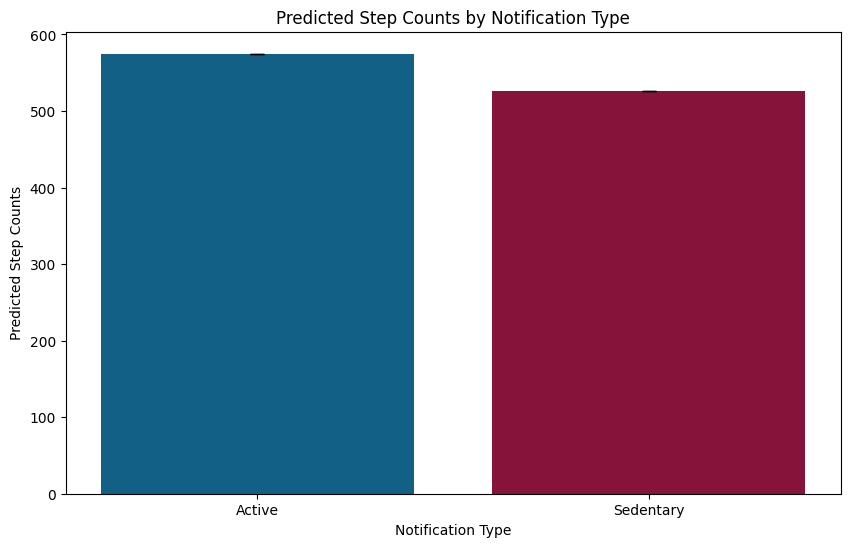

/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_68532/2724910370.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  observed_summary = mydata_steps_gf.groupby('notif_type').agg(
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


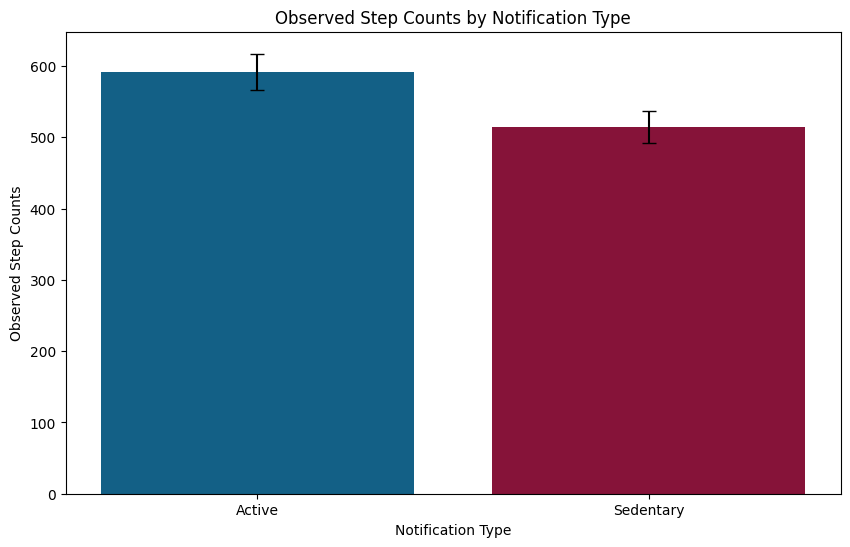

gfsteps30     2071
notif_type       0
user.index       0
dtype: int64


/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))
/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_68532/2724910370.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predictions_summary_30 = mydata_steps_gf.groupby('notif_type').agg(
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


                Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     gfsteps30  
No. Observations:     2610        Method:                 REML       
No. Groups:           25          Scale:                  119226.4869
Min. group size:      23          Log-Likelihood:         -18969.8141
Max. group size:      152         Converged:              Yes        
Mean group size:      104.4                                          
---------------------------------------------------------------------
                         Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept                133.809   17.226 7.768 0.000 100.046 167.572
notif_type[T.Sedentary]   26.519   13.732 1.931 0.053  -0.396  53.433
Group Var               5045.863    5.184                            



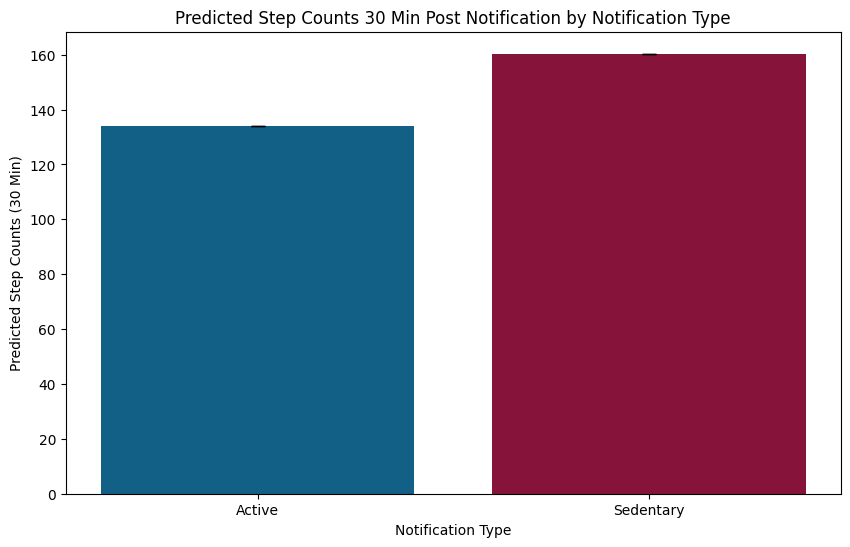

/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_68532/2724910370.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  observed_summary_30 = mydata_steps_gf.groupby('notif_type').agg(
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


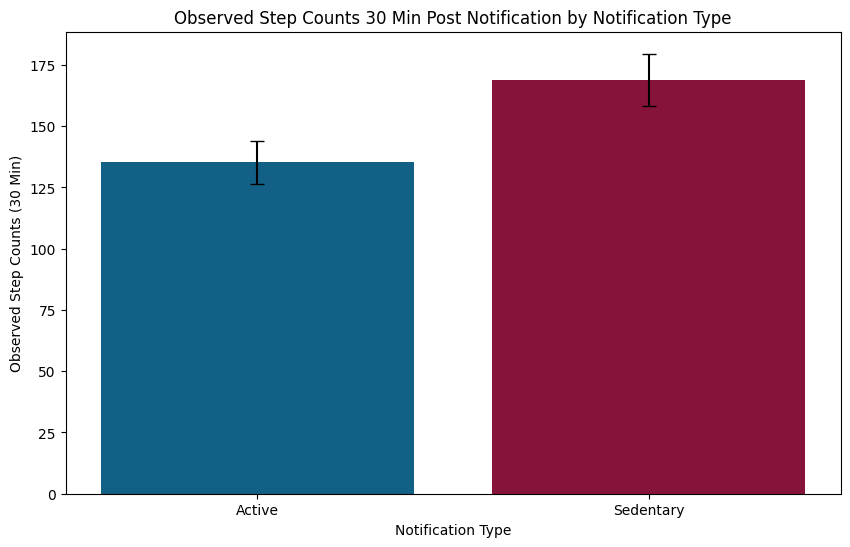

/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))
/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_68532/2724910370.py:145: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predictions_summary_60 = mydata_steps_gf.groupby('notif_type').agg(
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     gfsteps60  
No. Observations:      2610        Method:                 REML       
No. Groups:            25          Scale:                  318924.0602
Min. group size:       23          Log-Likelihood:         -20258.4144
Max. group size:       152         Converged:              Yes        
Mean group size:       104.4                                          
----------------------------------------------------------------------
                          Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
----------------------------------------------------------------------
Intercept                 286.911   34.549 8.304 0.000 219.196 354.627
notif_type[T.Sedentary]    54.086   22.478 2.406 0.016  10.030  98.142
Group Var               23441.374   13.612                            



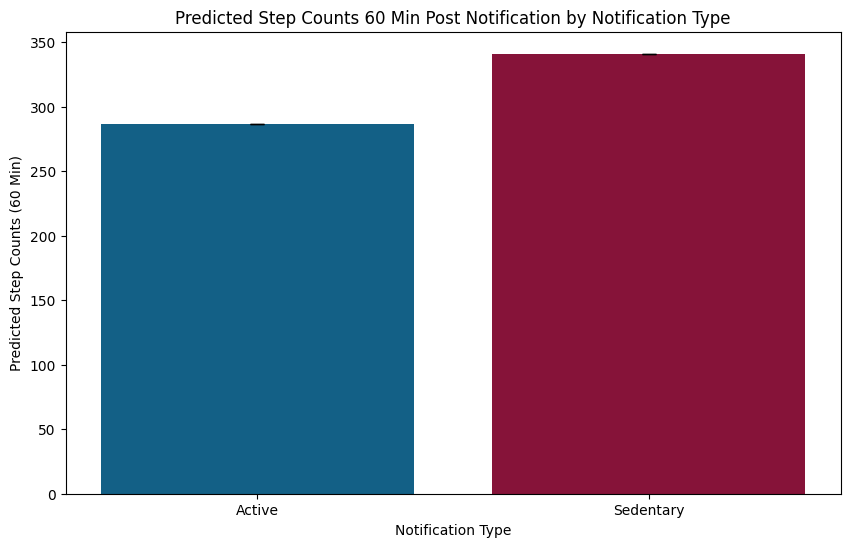

/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_68532/2724910370.py:164: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  observed_summary_60 = mydata_steps_gf.groupby('notif_type').agg(
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


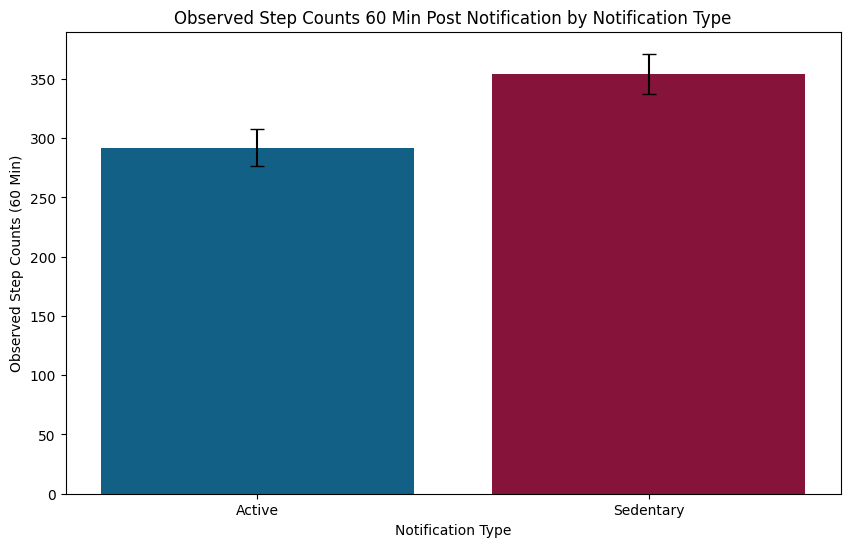

In [3]:
#====================================================================
# RQ 1: Effects of Framing Styles on Step Counts
# GF DATA: total between notif, 30min post notif, 60min post notif
#====================================================================

# load data
# mydata_steps_gf <- pd.read_csv(os.path.join(data_dir, "mydata_steps_gf_py.csv"))
mydata_steps_gf['user.index'] = mydata_steps_gf['user.index'].astype(str).astype('category')
mydata_steps_gf['notif_type'] = mydata_steps_gf['notif_type'].astype('category')

suggestions_dat['user.index'] = suggestions_dat['user.index'].astype(str).astype('category')
suggestions_dat['decision.index'] = suggestions_dat['decision.index'].astype('category')


# Extract required columns
gfsteps30 = suggestions_dat[['user.index', 'decision.index', 'gfsteps30']]
gfsteps60 = suggestions_dat[['user.index', 'decision.index', 'gfsteps60']]

# Merge with unique suffixes to avoid column duplication
mydata_steps_gf = pd.merge(mydata_steps_gf, gfsteps30, on=['user.index', 'decision.index'], how='left')
mydata_steps_gf = pd.merge(mydata_steps_gf, gfsteps60, on=['user.index', 'decision.index'], how='left')

print(mydata_steps_gf.head())


from statsmodels.formula.api import mixedlm

#====================================================================
# GF DATA: total between notif (total_steps)
#====================================================================
# Define the model and fit (approximate approach using MixedLM)
model_nb_glmm = mixedlm("total_steps ~ notif_type", mydata_steps_gf, groups=mydata_steps_gf["user.index"])
result = model_nb_glmm.fit()
print(result.summary())

# Add predicted values into dataframe and 
# Create a summary of predicted values for plotting
mydata_steps_gf['predicted_steps'] = result.predict()
predictions_summary = mydata_steps_gf.groupby('notif_type').agg(
    mean_pred=('predicted_steps', 'mean'),
    lower_ci=('predicted_steps', lambda x: np.quantile(x, 0.025)),
    upper_ci=('predicted_steps', lambda x: np.quantile(x, 0.975)),
    se_pred=('predicted_steps', lambda x: np.std(x) / np.sqrt(len(x)))
).reset_index()

# plot PREDICTED values 
plt.figure(figsize=(10, 6))
sns.barplot(data=predictions_summary, x="notif_type", y="mean_pred", palette={"Active": "#006699", "Sedentary": "#990033"})
plt.errorbar(predictions_summary['notif_type'], predictions_summary['mean_pred'], 
             yerr=predictions_summary['se_pred'], fmt='none', color='black', capsize=5)
plt.title("Predicted Step Counts by Notification Type")
plt.xlabel("Notification Type")
plt.ylabel("Predicted Step Counts")
plt.savefig(os.path.join(figure_dir, "pred_rq1.png"), transparent=True)
plt.show()

# Add OBSERVED values into dataframe and create a summary for plotting
observed_summary = mydata_steps_gf.groupby('notif_type').agg(
    mean_obs=('total_steps', 'mean'),
    lower_ci=('total_steps', lambda x: np.quantile(x, 0.025)),
    upper_ci=('total_steps', lambda x: np.quantile(x, 0.975)),
    se_obs=('total_steps', lambda x: np.std(x) / np.sqrt(len(x)))
).reset_index()

# plot OBSERVED values 
plt.figure(figsize=(10, 6))
sns.barplot(data=observed_summary, x="notif_type", y="mean_obs", palette={"Active": "#006699", "Sedentary": "#990033"})
plt.errorbar(observed_summary['notif_type'], observed_summary['mean_obs'], 
             yerr=observed_summary['se_obs'], fmt='none', color='black', capsize=5)
plt.title("Observed Step Counts by Notification Type")
plt.xlabel("Notification Type")
plt.ylabel("Observed Step Counts")
plt.savefig(os.path.join(figure_dir,"obs_rq1.png"), transparent=True)
plt.show()


#====================================================================
# GF DATA: total steps 30 min after notif (gfsteps30)
#====================================================================
# we need to do the same thing as the steps we did above, but now for the steps 30-min post the notification
print(mydata_steps_gf[['gfsteps30', 'notif_type', 'user.index']].isnull().sum())
# Filter out rows where 'gfsteps30' is NaN
# Filter out rows where 'gfsteps30' or 'gfsteps60' are NaN
mydata_steps_gf = mydata_steps_gf.dropna(subset=['gfsteps30', 'gfsteps60']).reset_index(drop=True)


# Define the model and fit (approximate approach using MixedLM)
model_gf30_glmm = mixedlm("gfsteps30 ~ notif_type", mydata_steps_gf, groups=mydata_steps_gf["user.index"])
result_gf30 = model_gf30_glmm.fit()
print(result_gf30.summary())

# Add predicted values into dataframe and 
# Create a summary of predicted values for plotting
mydata_steps_gf['predicted_steps_30'] = result_gf30.predict()
predictions_summary_30 = mydata_steps_gf.groupby('notif_type').agg(
    mean_pred=('predicted_steps_30', 'mean'),
    lower_ci=('predicted_steps_30', lambda x: np.quantile(x, 0.025)),
    upper_ci=('predicted_steps_30', lambda x: np.quantile(x, 0.975)),
    se_pred=('predicted_steps_30', lambda x: np.std(x) / np.sqrt(len(x)))
).reset_index()

# Plot PREDICTED values for gfsteps30
plt.figure(figsize=(10, 6))
sns.barplot(data=predictions_summary_30, x="notif_type", y="mean_pred", palette={"Active": "#006699", "Sedentary": "#990033"})
plt.errorbar(predictions_summary_30['notif_type'], predictions_summary_30['mean_pred'], 
             yerr=predictions_summary_30['se_pred'], fmt='none', color='black', capsize=5)
plt.title("Predicted Step Counts 30 Min Post Notification by Notification Type")
plt.xlabel("Notification Type")
plt.ylabel("Predicted Step Counts (30 Min)")
plt.savefig(os.path.join(figure_dir, "pred_rq1_30min.png"), transparent=True)
plt.show()

# Add OBSERVED values into dataframe and create a summary for plotting
observed_summary_30 = mydata_steps_gf.groupby('notif_type').agg(
    mean_obs=('gfsteps30', 'mean'),
    lower_ci=('gfsteps30', lambda x: np.quantile(x, 0.025)),
    upper_ci=('gfsteps30', lambda x: np.quantile(x, 0.975)),
    se_obs=('gfsteps30', lambda x: np.std(x) / np.sqrt(len(x)))
).reset_index()

# Plot OBSERVED values for gfsteps30
plt.figure(figsize=(10, 6))
sns.barplot(data=observed_summary_30, x="notif_type", y="mean_obs", palette={"Active": "#006699", "Sedentary": "#990033"})
plt.errorbar(observed_summary_30['notif_type'], observed_summary_30['mean_obs'], 
             yerr=observed_summary_30['se_obs'], fmt='none', color='black', capsize=5)
plt.title("Observed Step Counts 30 Min Post Notification by Notification Type")
plt.xlabel("Notification Type")
plt.ylabel("Observed Step Counts (30 Min)")
plt.savefig(os.path.join(figure_dir, "obs_rq1_30min.png"), transparent=True)
plt.show()

#====================================================================
# GF DATA: total steps 60 min after notif (gfsteps60)
#====================================================================
# we need to do the same thing as the steps we did above, but now for the steps 60-min post the notification

# Define the model and fit (approximate approach using MixedLM)
model_gf60_glmm = mixedlm("gfsteps60 ~ notif_type", mydata_steps_gf, groups=mydata_steps_gf["user.index"])
result_gf60 = model_gf60_glmm.fit()
print(result_gf60.summary())

# Add predicted values into dataframe and 
# Create a summary of predicted values for plotting
mydata_steps_gf['predicted_steps_60'] = result_gf60.predict()
predictions_summary_60 = mydata_steps_gf.groupby('notif_type').agg(
    mean_pred=('predicted_steps_60', 'mean'),
    lower_ci=('predicted_steps_60', lambda x: np.quantile(x, 0.025)),
    upper_ci=('predicted_steps_60', lambda x: np.quantile(x, 0.975)),
    se_pred=('predicted_steps_60', lambda x: np.std(x) / np.sqrt(len(x)))
).reset_index()

# Plot PREDICTED values for gfsteps60
plt.figure(figsize=(10, 6))
sns.barplot(data=predictions_summary_60, x="notif_type", y="mean_pred", palette={"Active": "#006699", "Sedentary": "#990033"})
plt.errorbar(predictions_summary_60['notif_type'], predictions_summary_60['mean_pred'], 
             yerr=predictions_summary_60['se_pred'], fmt='none', color='black', capsize=5)
plt.title("Predicted Step Counts 60 Min Post Notification by Notification Type")
plt.xlabel("Notification Type")
plt.ylabel("Predicted Step Counts (60 Min)")
plt.savefig(os.path.join(figure_dir, "pred_rq1_60min.png"), transparent=True)
plt.show()

# Add OBSERVED values into dataframe and create a summary for plotting
observed_summary_60 = mydata_steps_gf.groupby('notif_type').agg(
    mean_obs=('gfsteps60', 'mean'),
    lower_ci=('gfsteps60', lambda x: np.quantile(x, 0.025)),
    upper_ci=('gfsteps60', lambda x: np.quantile(x, 0.975)),
    se_obs=('gfsteps60', lambda x: np.std(x) / np.sqrt(len(x)))
).reset_index()

# Plot OBSERVED values for gfsteps60
plt.figure(figsize=(10, 6))
sns.barplot(data=observed_summary_60, x="notif_type", y="mean_obs", palette={"Active": "#006699", "Sedentary": "#990033"})
plt.errorbar(observed_summary_60['notif_type'], observed_summary_60['mean_obs'], 
             yerr=observed_summary_60['se_obs'], fmt='none', color='black', capsize=5)
plt.title("Observed Step Counts 60 Min Post Notification by Notification Type")
plt.xlabel("Notification Type")
plt.ylabel("Observed Step Counts (60 Min)")
plt.savefig(os.path.join(figure_dir, "obs_rq1_60min.png"), transparent=True)
plt.show()




# Start of analyses with the JAWBONE DATASET 


#====================================================================
# JAWBONE DATA: total between notif (total_steps)
#====================================================================
# we need to do the same thing as the steps we did above, but now for the steps 30-min post the notification


#====================================================================
# JAWBONE DATA: total steps 30 min after notif (total_steps_30)
#====================================================================
# we need to do the same thing as the steps we did above, but now for the steps 30-min post the notification


#====================================================================
# JAWBONE DATA: total steps 60 min after notif (total_steps_60)
#====================================================================
# we need to do the same thing as the steps we did above, but now for the steps 60-min post the notification

## RQ 1b: Effects of Framing Styles * Self-Efficacy on Step Counts

For this, basically we want to add the interaction term between self_efficacy (as discrete variable: low, medium, and high) into the models above. 
- GF: 
    - total steps ~ notif_type * self_efficacy 
    - 30 after ~ notif_type * self_efficacy
    - 60 after ~ notif_type * self_efficacy

- JAWBONE: 
    - total steps ~ notif_type * self_efficacy 
    - 30 after ~ notif_type * self_efficacy
    - 60 after ~ notif_type * self_efficacy


0.25    12.0
0.50    16.0
0.75    18.0
Name: selfeff_intake_r, dtype: float64
  notif_type selfeff_category    n    mean      sd    se     IQR
0     Active              Low  414   876.9  1378.8  67.8   937.8
1     Active           Medium  504   942.4  1169.4  52.1  1270.2
2     Active             High  403  1165.4  1726.7  86.0  1493.5
3  Sedentary              Low  444   838.0  1340.9  63.6   902.5
4  Sedentary           Medium  415   974.2  1219.0  59.8  1348.5
5  Sedentary             High  430  1148.9  1433.3  69.1  1507.8


/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_68532/1102757616.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['notif_type', 'selfeff_category'])
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na op

                                Mixed Linear Model Regression Results
Model:                           MixedLM               Dependent Variable:               total_steps 
No. Observations:                2610                  Method:                           REML        
No. Groups:                      25                    Scale:                            1678015.3749
Min. group size:                 23                    Log-Likelihood:                   -22405.0421 
Max. group size:                 152                   Converged:                        Yes         
Mean group size:                 104.4                                                               
-----------------------------------------------------------------------------------------------------
                                                     Coef.    Std.Err.   z    P>|z|  [0.025   0.975] 
-----------------------------------------------------------------------------------------------------
Intercept   

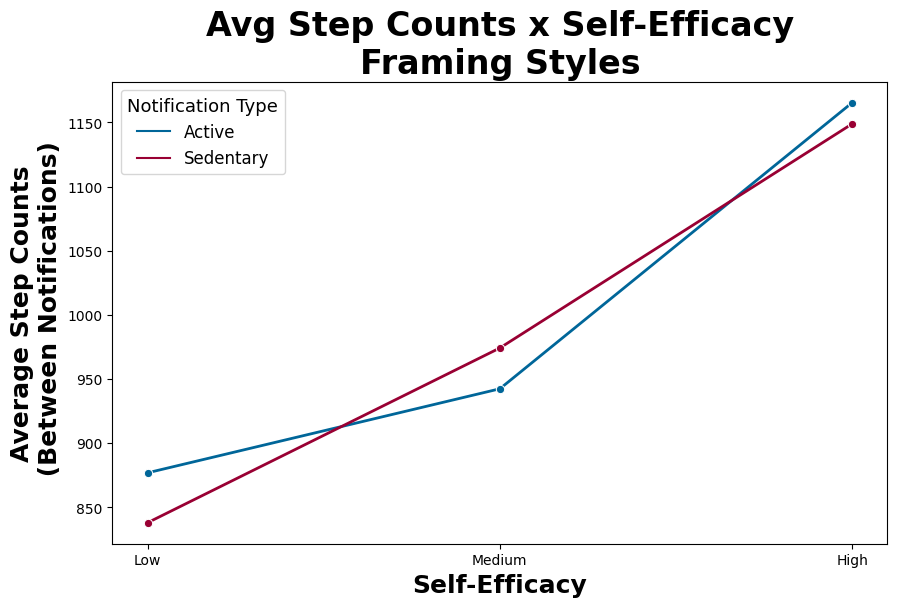

In [4]:
#====================================================================
# RQ 1b: Effects of Framing Styles * Self-Efficacy on Step Counts
# GF: total_steps between notif
#====================================================================

# load data
# mydata_steps_gf <- pd.read_csv(os.path.join(data_dir, "mydata_steps_gf_py.csv"))
mydata_steps_gf['user.index'] = mydata_steps_gf['user.index'].astype('category')
mydata_steps_gf['notif_type'] = mydata_steps_gf['notif_type'].astype('category')

# Define self efficacy as a discrete variable based on its quantile
# low (<=13), med (14-17 inclusive), high (>=18)
selfeff_intake_quantiles = mydata_steps_gf['selfeff_intake_r'].quantile([0.25, 0.5, 0.75])
print(selfeff_intake_quantiles)

# Categorize selfeff.intake_r for visualization
# low (<=13), med (14-17 inclusive), high (>=18)
mydata_steps_gf['selfeff_category'] = pd.cut(
    mydata_steps_gf['selfeff_intake_r'], bins=[-np.inf, 14, 18, np.inf], labels=["Low", "Medium", "High"], right=False
)

# Create summary table
SUMM_mydata_steps_gf = (
    mydata_steps_gf
    .groupby(['notif_type', 'selfeff_category'])
    .agg(
        n=('total_steps', 'size'),
        mean=('total_steps', lambda x: round(np.mean(x), 1)),
        sd=('total_steps', lambda x: round(np.std(x), 1)),
        se=('total_steps', lambda x: round(np.std(x) / np.sqrt(x.notna().sum()), 1)),
        IQR=('total_steps', lambda x: round(np.percentile(x, 75) - np.percentile(x, 25), 1))
    )
    .reset_index()
)

print(SUMM_mydata_steps_gf)


from statsmodels.formula.api import mixedlm
# Define the model and fit (approximate approach using MixedLM)
model_nb_glmm_notifxselfeff = mixedlm("total_steps ~ notif_type * selfeff_category", mydata_steps_gf, groups=mydata_steps_gf["user.index"])
result = model_nb_glmm_notifxselfeff.fit()
print(result.summary())


# Plot interaction effects (no interaction :( sadly)
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=SUMM_mydata_steps_gf, x="selfeff_category", y="mean", hue="notif_type", 
    marker="o", palette={"Active": "#006699", "Sedentary": "#990033"}, linewidth=2
)
plt.title("Avg Step Counts x Self-Efficacy\nFraming Styles", fontsize=24, fontweight='bold')
plt.xlabel("Self-Efficacy", fontsize=18, fontweight='bold')
plt.ylabel("Average Step Counts\n (Between Notifications)", fontsize=18, fontweight='bold')
plt.legend(title="Notification Type", fontsize=12, title_fontsize='13')

# Save the plot
plt.savefig(os.path.join(figure_dir,"notif_selfeff_steps_bwnotif.png"), transparent=True)
plt.show()


#====================================================================
# RQ 1b: Effects of Framing Styles * Self-Efficacy on Step Counts
# GF: total_steps 30 min after notif
#====================================================================


#====================================================================
# RQ 1b: Effects of Framing Styles * Self-Efficacy on Step Counts
# GF: total_steps 60 min after notif
#====================================================================






# Start of analyses with the JAWBONE DATASET 



#====================================================================
# RQ 1b: Effects of Framing Styles * Self-Efficacy on Step Counts
# Jawbone: total_steps between notif
#====================================================================


#====================================================================
# RQ 1b: Effects of Framing Styles * Self-Efficacy on Step Counts
# Jawbone: total_steps 30 min after notif
#====================================================================


#====================================================================
# RQ 1b: Effects of Framing Styles * Self-Efficacy on Step Counts
# JawboneF: total_steps 60 min after notif
#====================================================================



## RQ 2a: Effects of Framing Styles on User Engagement (min between notif and first meaningful steps (at least 60steps))


/var/folders/rb/s8fz0j0d7xq20qvk9cm9vf9m0000gp/T/ipykernel_68532/1581920954.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: pd.Series({
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zhiduokatara/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_i

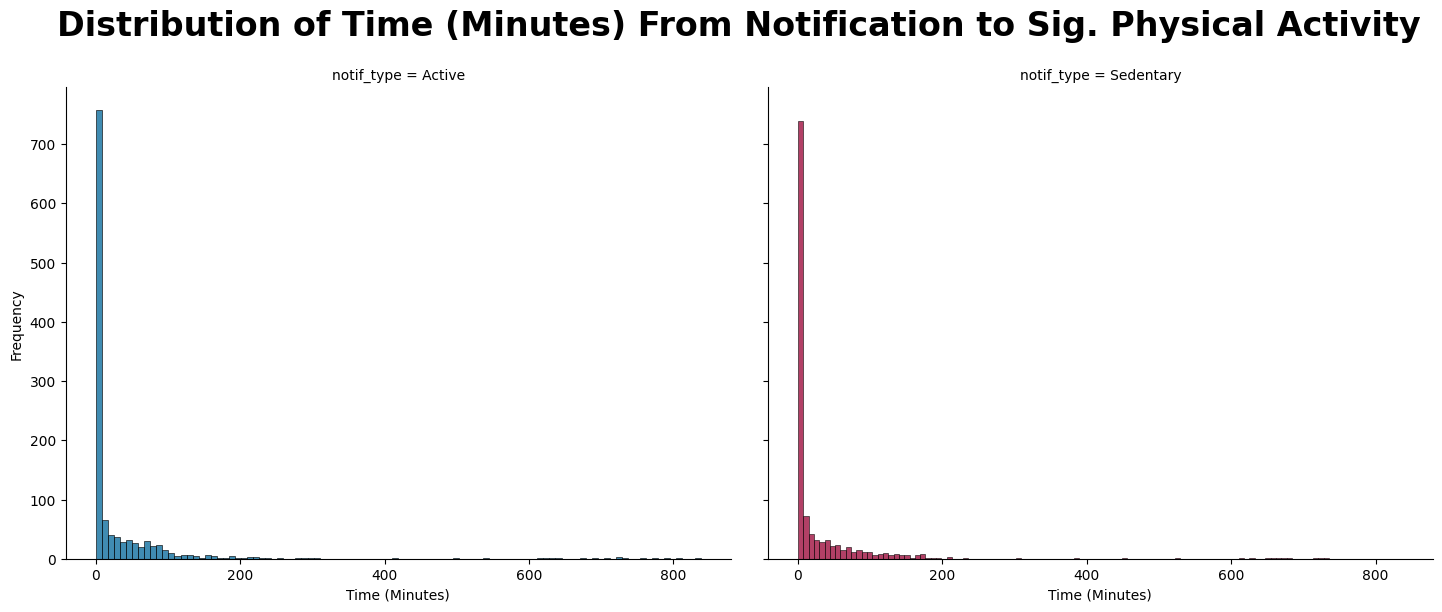

OSError: cannot load library '/Library/Frameworks/R.framework/Resources/lib/libR.dylib': dlopen(/Library/Frameworks/R.framework/Resources/lib/libR.dylib, 0x0002): tried: '/Library/Frameworks/R.framework/Resources/lib/libR.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Resources/lib/libR.dylib' (no such file), '/Library/Frameworks/R.framework/Resources/lib/libR.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libR.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libR.dylib' (no such file), '/Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libR.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64'))

In [5]:
# Convert `steps.utime` to datetime format and sort within each group
clean_steps_notif_users['steps.utime'] = pd.to_datetime(clean_steps_notif_users['steps.utime'])

# Group data and calculate time to significant activity (>= 60 steps)
ux_eng = (
    clean_steps_notif_users
    .sort_values(['user.index', 'decision.index', 'steps.utime'])
    .dropna(subset=['steps'])  # Filter out rows where 'steps' is NA since we are finding only time with steps
    .groupby(['user.index', 'decision.index', 'notif_type'])
    .apply(lambda df: pd.Series({
        'first_step_time': df['steps.utime'].iloc[0],
        'step_ge_60_time': df.loc[df['steps'] >= 60, 'steps.utime'].iloc[0] if not df.loc[df['steps'] >= 60].empty else np.nan,
        'selfeff_intake_r': df['selfeff_intake_r'].iloc[0]
    }))
    .reset_index()
)

ux_eng['user.index'] = ux_eng['user.index'].astype(str).astype('category')
ux_eng['notif_type'] = ux_eng['notif_type'].astype('category')

# Calculate time to step >= 60 in minutes and handle missing or zero values
ux_eng['time_to_step_ge_60'] = (ux_eng['step_ge_60_time'] - ux_eng['first_step_time']).dt.total_seconds() / 60
ux_eng['time_to_step_ge_60'] = ux_eng['time_to_step_ge_60'].fillna(0.01).round(2) #use 0.01 because GLMM only deals with positive values
ux_eng = ux_eng.sort_values(['user.index', 'decision.index'])



# Plot Faceted Histogram of Resp Time
# Set up the FacetGrid with 'notif_type' as the facet variable
mypalette = {"Active": "#006699", "Sedentary": "#990033"}
g = sns.FacetGrid(ux_eng, col="notif_type", height=6, aspect=1.2, sharex=True, sharey=True, palette=mypalette)
# Map sns.histplot to each facet, using the color for each 'notif_type'
for ax, (notif_type, color) in zip(g.axes.flat, mypalette.items()):
    sns.histplot(
        data=ux_eng[ux_eng['notif_type'] == notif_type],
        x="time_to_step_ge_60", bins=100, color=color, edgecolor="black", ax=ax
    )
g.figure.suptitle("Distribution of Time (Minutes) From Notification to Sig. Physical Activity", fontsize=24, weight='bold')
g.set_axis_labels("Time (Minutes)", "Frequency")
plt.subplots_adjust(top=0.85)
# Save the facet-wrapped plot with a transparent background
g.savefig(os.path.join(figure_dir,"resptime_faceted.png"), transparent=True)
plt.show()



from pymer4.models import Lmer
# Fit the model using pymer4 (requires R to be installed and accessible)
model_response_time = Lmer("time_to_step_ge_60 ~ notif_type + (1 | user.index)", data=ux_eng)
model_response_time.fit()
print(model_response_time.summary())


# Generate predictions on the original scale
# THIS SHOULD BE REVISITED. DO WE WANT TO SPLIT OUR DATASET INTO TRAINING VS. TEST within GF and within JAWBONE DATASET OR SHOULD WE USE GF DATA TO TRAIN AND TEST ON JAWBONE?
ux_eng['predicted_steps'] = model_response_time.predict(data=ux_eng, skip_data_checks=True, verify_predictions=False)


# Summarize predicted values by notification type
ux_predictions_summary = ux_eng.groupby('notif_type').agg(
    mean_pred=('predicted_steps', 'mean'),
    lower_ci=('predicted_steps', lambda x: np.quantile(x, 0.025)),
    upper_ci=('predicted_steps', lambda x: np.quantile(x, 0.975)),
    se_pred=('predicted_steps', lambda x: np.std(x) / np.sqrt(len(x)))
).reset_index()


# Plot PREDICTED Response Time 
plt.figure(figsize=(10, 6))
sns.barplot(data=ux_predictions_summary, x="notif_type", y="mean_pred", palette={"Active": "#006699", "Sedentary": "#990033"}, edgecolor="black")
plt.errorbar(ux_predictions_summary['notif_type'], ux_predictions_summary['mean_pred'], 
             yerr=ux_predictions_summary['se_pred'], fmt='none', color='black', capsize=5)
plt.title("Predicted Response Time by Notification Type", fontsize=24, fontweight='bold')
plt.xlabel("Notification Type", fontsize=18, fontweight='bold')
plt.ylabel("Predicted Response Time (Mins)", fontsize=18, fontweight='bold')
plt.legend(title="Notification Type", fontsize=12, title_fontsize='13')

# Save plot
plt.savefig(os.path.join(figure_dir, "pred_rq2.png"), transparent=True)
plt.show()

SyntaxError: invalid syntax (3055030206.py, line 1)